In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import scipy.stats as stats
import seaborn as sns
from yahooquery import Ticker
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datapackage
from datetime import date,datetime,timedelta

pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn")

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/554235697.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
def compute_month_return(stock): 
    month_return=stock_data[stock].Close[-1] / stock_data[stock].Close[0]
    return month_return
def compute_std_deviation(stock):
    stock_data[stock]['log_return'] = np.log(stock_data[stock].Close.div(stock_data[stock].Close.shift(1)))
    std = stock_data[stock]['log_return'].std()
    return std

In [3]:
data_url = 'https://datahub.io/core/s-and-p-500-companies/datapackage.json'
package = datapackage.Package(data_url)
resources = package.resources
for resource in resources:
    if resource.tabular:
        stock_to_analyze = pd.read_csv(resource.descriptor['path'])

stock_to_analyze

,Symbol,Name,Sector
0,MMM,3M,Industrials
1,AOS,A. O. Smith,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie,Health Care
4,ABMD,Abiomed,Health Care
...,...,...,...
500,YUM,Yum! Brands,Consumer Discretionary
501,ZBRA,Zebra Technologies,Information Technology
502,ZBH,Zimmer Biomet,Health Care
503,ZION,Zions Bancorp,Financials


In [4]:
end = s- timedelta(days=1)
start=end - timedelta(days=31)
stock_data={}
stock_to_analyze['is_null']=False
for index, row in stock_to_analyze.iterrows():
    stock=row.Symbol
    stock_data[stock]= yf.download(stock,start,end)
    if len(stock_data[stock])==0:
        stock_to_analyze.loc[index,'is_null'] = True
        
stock_to_analyze_filtred=stock_to_analyze[stock_to_analyze['is_null']==False]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ABMD: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[****************

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CTXS: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- NLOK: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [5]:
stock_to_analyze_filtred['month_return']=stock_to_analyze_filtred.apply(lambda row : compute_month_return(row['Symbol']), axis=1)
stock_to_analyze_filtred['std']=stock_to_analyze_filtred.apply(lambda row : compute_std_deviation(row['Symbol']), axis=1)


/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/2182226871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['month_return']=stock_to_analyze_filtred.apply(lambda row : compute_month_return(row['Symbol']), axis=1)
/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/2182226871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['std']=stock_to_analyze_filtred.apply(lambda row : compute_std_deviation(row['Symbol']), axis=1)


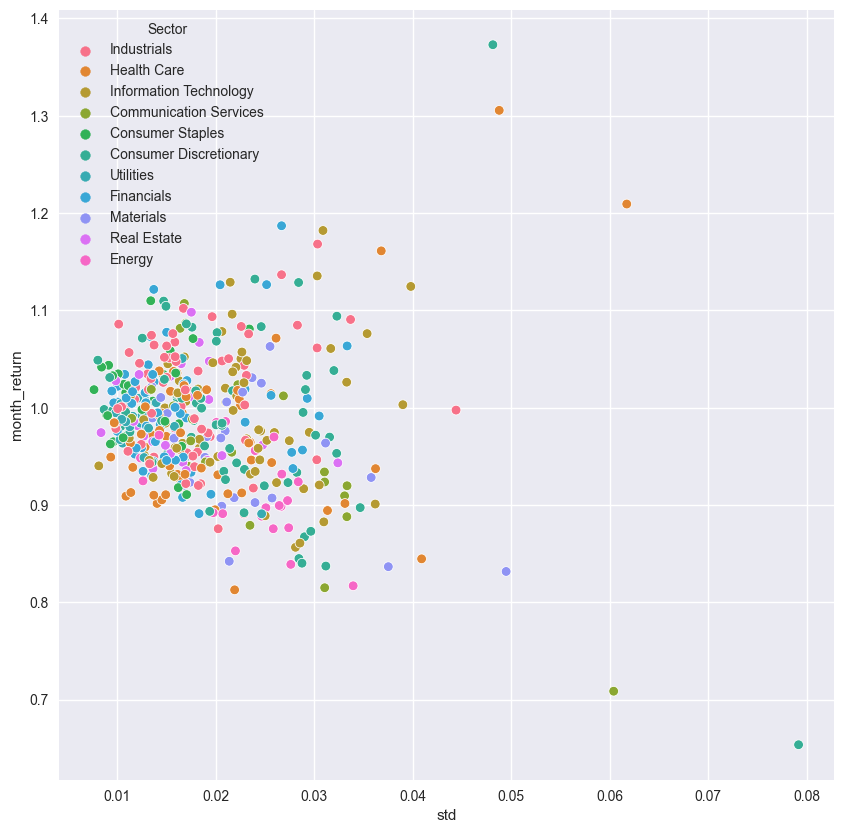

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='std', y='month_return', hue='Sector', data=stock_to_analyze_filtred) 
plt.show()

In [7]:
Sectors=stock_to_analyze_filtred.groupby(['Sector'])['month_return', 'std'].mean()
Sectors.sort_values(by=['month_return'], ascending=False)

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/3957435317.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Sectors=stock_to_analyze_filtred.groupby(['Sector'])['month_return', 'std'].mean()


,month_return,std
Sector,,
Industrials,1.0122,0.0177
Consumer Staples,1.0076,0.0125
Financials,0.9969,0.0163
Information Technology,0.9916,0.0214
Real Estate,0.9900,0.0162
Consumer Discretionary,0.9890,0.0221
Utilities,0.9848,0.0129
Health Care,0.9749,0.0195
Communication Services,0.9590,0.0240


In [8]:
stock_to_analyze_filtred[stock_to_analyze_filtred['Sector']=='Financials'].sort_values(by=['month_return'], ascending=False)

,Symbol,Name,Sector,is_null,month_return,std
109,CINF,Cincinnati Financial,Financials,False,1.1870,0.0267
31,AXP,American Express,Financials,False,1.1265,0.0252
180,RE,Everest Re,Financials,False,1.1263,0.0204
377,PGR,Progressive Corporation,Financials,False,1.1216,0.0137
116,CME,CME Group,Financials,False,1.0776,0.0150
...,...,...,...,...,...,...
69,BLK,BlackRock,Financials,False,0.9301,0.0135
322,MCO,Moody's Corporation,Financials,False,0.9208,0.0165
326,NDAQ,Nasdaq,Financials,False,0.9111,0.0195
79,BRO,Brown & Brown,Financials,False,0.9078,0.0166


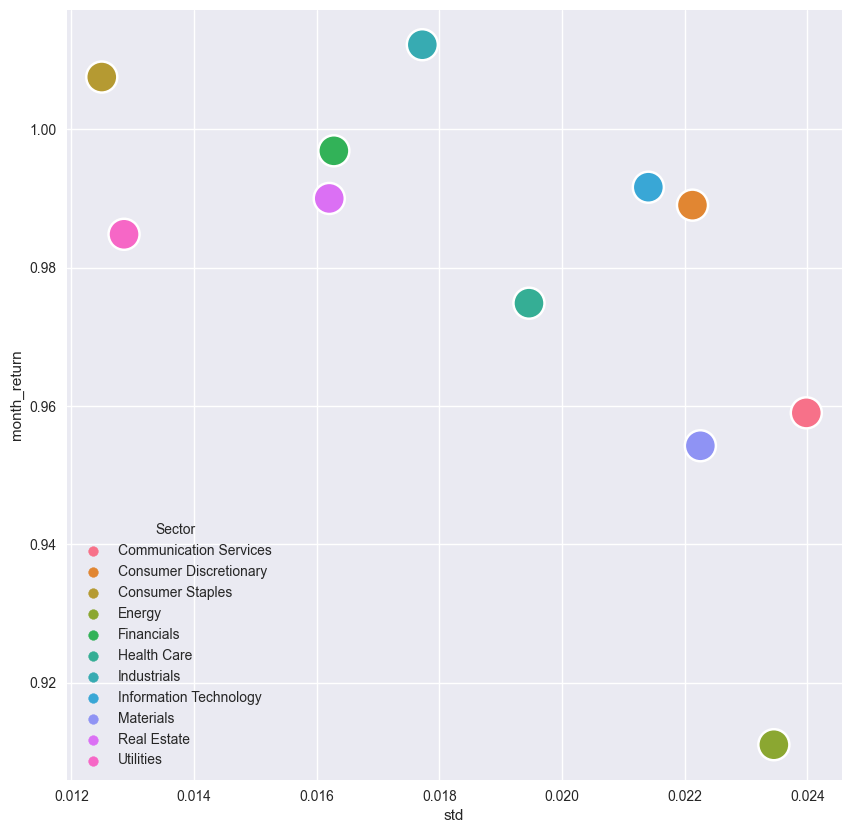

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='std', y='month_return', hue='Sector', data=Sectors, s=500) 
plt.show()

In [10]:
stock_to_analyze_filtred=stock_to_analyze_filtred.sort_values(by=['month_return'], ascending=False)
stock_to_analyze_filtred.groupby('Sector').head(2)

,Symbol,Name,Sector,is_null,month_return,std
436,TSLA,Tesla,Consumer Discretionary,False,1.3730,0.0481
90,CTLT,Catalent,Health Care,False,1.3056,0.0488
19,ALGN,Align Technology,Health Care,False,1.2093,0.0617
109,CINF,Cincinnati Financial,Financials,False,1.1870,0.0267
201,FTNT,Fortinet,Information Technology,False,1.1821,0.0309
479,GWW,W. W. Grainger,Industrials,False,1.1682,0.0303
463,URI,United Rentals,Industrials,False,1.1367,0.0267
256,IPGP,IPG Photonics,Information Technology,False,1.1354,0.0303
403,RCL,Royal Caribbean Group,Consumer Discretionary,False,1.1322,0.0240
31,AXP,American Express,Financials,False,1.1265,0.0252


In [29]:
Monthly_sector_mr=pd.DataFrame()
Monthly_sector_std=pd.DataFrame()

for x in range(1,13):
    start = datetime(2022,x,1)
    if x == 12:
         end = datetime(2022,12, 31)- timedelta(days=1)
    else:
        end = datetime(2022,x+1, 1)- timedelta(days=1)      
    stock_data={}
    stock_to_analyze['is_null']=False
    for index, row in stock_to_analyze.iterrows():
        stock=row.Symbol
        stock_data[stock]= yf.download(stock,start,end, progress=False)
        if len(stock_data[stock])==0:
            stock_to_analyze.loc[index,'is_null'] = True
            
    stock_to_analyze_filtred=stock_to_analyze[stock_to_analyze['is_null']==False]
    stock_to_analyze_filtred['month_return']=stock_to_analyze_filtred.apply(lambda row : compute_month_return(row['Symbol']), axis=1)
    stock_to_analyze_filtred['std']=stock_to_analyze_filtred.apply(lambda row : compute_std_deviation(row['Symbol']), axis=1)
    title="2022/"+str(x)
    Sectors_mr=stock_to_analyze_filtred.groupby(['Sector'])['month_return'].mean()
    Sectors_std=stock_to_analyze_filtred.groupby(['Sector'])['std'].mean()
    Monthly_sector_mr=pd.concat([Monthly_sector_mr,Sectors_mr], axis=1, join="outer")
    Monthly_sector_std=pd.concat([Monthly_sector_std,Sectors_std], axis=1, join="outer")

    display(Monthly_sector_mr)




1 Failed download:
- ANTM: No timezone found, symbol may be delisted

1 Failed download:
- BLL: No timezone found, symbol may be delisted

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted

1 Failed download:
- BF.B: AttributeError("'NoneType' object has no attribute 'tz_convert'")

1 Failed download:
- CERN: No timezone found, symbol may be delisted

1 Failed download:
- CTXS: No timezone found, symbol may be delisted

1 Failed download:
- DISCA: No timezone found, symbol may be delisted

1 Failed download:
- DISCK: No timezone found, symbol may be delisted

1 Failed download:
- DRE: No timezone found, symbol may be delisted

1 Failed download:
- FB: No timezone found, symbol may be delisted

1 Failed download:
- FBHS: No data found, symbol may be delisted

1 Failed download:
- INFO: No timezone found, symbol may be delisted

1 Failed download:
- KSU: No timezone found, symbol may be delisted

1 Failed download:
- NLSN: No timezone found, symbol may be delisted

1

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/975794443.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['month_return']=stock_to_analyze_filtred.apply(lambda row : compute_month_return(row['Symbol']), axis=1)
/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/975794443.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['std']=stock_to_analyze_filtred.apply(lambda row : compute_std_deviation(row['Symbol']), axis=1)


,month_return
Communication Services,0.9396
Consumer Discretionary,0.8919
Consumer Staples,0.9911
Energy,1.1452
Financials,0.9765
Health Care,0.9164
Industrials,0.9367
Information Technology,0.8750
Materials,0.9513
Real Estate,0.9257



1 Failed download:
- ANTM: No timezone found, symbol may be delisted

1 Failed download:
- BLL: No timezone found, symbol may be delisted

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted

1 Failed download:
- BF.B: AttributeError("'NoneType' object has no attribute 'tz_convert'")

1 Failed download:
- CERN: No timezone found, symbol may be delisted

1 Failed download:
- CTXS: No timezone found, symbol may be delisted

1 Failed download:
- DISCA: No timezone found, symbol may be delisted

1 Failed download:
- DISCK: No timezone found, symbol may be delisted

1 Failed download:
- DRE: No timezone found, symbol may be delisted

1 Failed download:
- FB: No timezone found, symbol may be delisted

1 Failed download:
- FBHS: No data found, symbol may be delisted

1 Failed download:
- INFO: No timezone found, symbol may be delisted

1 Failed download:
- KSU: No timezone found, symbol may be delisted

1 Failed download:
- NLSN: No timezone found, symbol may be delisted

1

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/975794443.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['month_return']=stock_to_analyze_filtred.apply(lambda row : compute_month_return(row['Symbol']), axis=1)
/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/975794443.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['std']=stock_to_analyze_filtred.apply(lambda row : compute_std_deviation(row['Symbol']), axis=1)


,month_return,month_return
Communication Services,0.9396,1.0046
Consumer Discretionary,0.8919,0.9618
Consumer Staples,0.9911,1.0039
Energy,1.1452,1.0113
Financials,0.9765,0.9970
Health Care,0.9164,1.0102
Industrials,0.9367,0.9773
Information Technology,0.8750,0.9620
Materials,0.9513,0.9946
Real Estate,0.9257,0.9874



1 Failed download:
- ANTM: No timezone found, symbol may be delisted

1 Failed download:
- BLL: No timezone found, symbol may be delisted

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted

1 Failed download:
- BF.B: AttributeError("'NoneType' object has no attribute 'tz_convert'")

1 Failed download:
- CERN: No timezone found, symbol may be delisted

1 Failed download:
- CTXS: No timezone found, symbol may be delisted

1 Failed download:
- DISCA: No timezone found, symbol may be delisted

1 Failed download:
- DISCK: No timezone found, symbol may be delisted

1 Failed download:
- DRE: No timezone found, symbol may be delisted

1 Failed download:
- FB: No timezone found, symbol may be delisted

1 Failed download:
- FBHS: No data found, symbol may be delisted

1 Failed download:
- INFO: No timezone found, symbol may be delisted

1 Failed download:
- KSU: No timezone found, symbol may be delisted

1 Failed download:
- NLSN: No timezone found, symbol may be delisted

1

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/975794443.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['month_return']=stock_to_analyze_filtred.apply(lambda row : compute_month_return(row['Symbol']), axis=1)
/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/975794443.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['std']=stock_to_analyze_filtred.apply(lambda row : compute_std_deviation(row['Symbol']), axis=1)


,month_return,month_return,month_return
Communication Services,0.9396,1.0046,1.0195
Consumer Discretionary,0.8919,0.9618,1.0183
Consumer Staples,0.9911,1.0039,1.0199
Energy,1.1452,1.0113,1.1117
Financials,0.9765,0.9970,1.0596
Health Care,0.9164,1.0102,1.0493
Industrials,0.9367,0.9773,1.0623
Information Technology,0.8750,0.9620,1.0610
Materials,0.9513,0.9946,1.0968
Real Estate,0.9257,0.9874,1.0875



1 Failed download:
- ANTM: No timezone found, symbol may be delisted

1 Failed download:
- BLL: No timezone found, symbol may be delisted

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted

1 Failed download:
- BF.B: AttributeError("'NoneType' object has no attribute 'tz_convert'")

1 Failed download:
- CERN: No timezone found, symbol may be delisted

1 Failed download:
- CTXS: No timezone found, symbol may be delisted

1 Failed download:
- DISCA: No timezone found, symbol may be delisted

1 Failed download:
- DISCK: No timezone found, symbol may be delisted

1 Failed download:
- DRE: No timezone found, symbol may be delisted

1 Failed download:
- FB: No timezone found, symbol may be delisted

1 Failed download:
- FBHS: No data found, symbol may be delisted

1 Failed download:
- INFO: No timezone found, symbol may be delisted

1 Failed download:
- KSU: No timezone found, symbol may be delisted

1 Failed download:
- NLSN: No timezone found, symbol may be delisted

1

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/975794443.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['month_return']=stock_to_analyze_filtred.apply(lambda row : compute_month_return(row['Symbol']), axis=1)
/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/975794443.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['std']=stock_to_analyze_filtred.apply(lambda row : compute_std_deviation(row['Symbol']), axis=1)


,month_return,month_return,month_return,month_return
Communication Services,0.9396,1.0046,1.0195,0.8785
Consumer Discretionary,0.8919,0.9618,1.0183,0.9494
Consumer Staples,0.9911,1.0039,1.0199,1.0176
Energy,1.1452,1.0113,1.1117,0.9658
Financials,0.9765,0.9970,1.0596,0.9063
Health Care,0.9164,1.0102,1.0493,0.9086
Industrials,0.9367,0.9773,1.0623,0.9417
Information Technology,0.8750,0.9620,1.0610,0.9003
Materials,0.9513,0.9946,1.0968,0.9669
Real Estate,0.9257,0.9874,1.0875,0.9415



1 Failed download:
- ANTM: No timezone found, symbol may be delisted

1 Failed download:
- BLL: No timezone found, symbol may be delisted

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted

1 Failed download:
- BF.B: AttributeError("'NoneType' object has no attribute 'tz_convert'")

1 Failed download:
- CERN: No timezone found, symbol may be delisted

1 Failed download:
- CTXS: No timezone found, symbol may be delisted

1 Failed download:
- DISCA: No timezone found, symbol may be delisted

1 Failed download:
- DISCK: No timezone found, symbol may be delisted

1 Failed download:
- DRE: No timezone found, symbol may be delisted

1 Failed download:
- FB: No timezone found, symbol may be delisted

1 Failed download:
- FBHS: No data found, symbol may be delisted

1 Failed download:
- INFO: No timezone found, symbol may be delisted

1 Failed download:
- KSU: No timezone found, symbol may be delisted

1 Failed download:
- NLSN: No timezone found, symbol may be delisted

1

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/975794443.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['month_return']=stock_to_analyze_filtred.apply(lambda row : compute_month_return(row['Symbol']), axis=1)
/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/975794443.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['std']=stock_to_analyze_filtred.apply(lambda row : compute_std_deviation(row['Symbol']), axis=1)


,month_return,month_return,month_return,month_return,month_return
Communication Services,0.9396,1.0046,1.0195,0.8785,1.0002
Consumer Discretionary,0.8919,0.9618,1.0183,0.9494,0.9424
Consumer Staples,0.9911,1.0039,1.0199,1.0176,0.9868
Energy,1.1452,1.0113,1.1117,0.9658,1.1716
Financials,0.9765,0.9970,1.0596,0.9063,1.0299
Health Care,0.9164,1.0102,1.0493,0.9086,1.0305
Industrials,0.9367,0.9773,1.0623,0.9417,1.0030
Information Technology,0.8750,0.9620,1.0610,0.9003,1.0152
Materials,0.9513,0.9946,1.0968,0.9669,1.0346
Real Estate,0.9257,0.9874,1.0875,0.9415,0.9868



1 Failed download:
- ANTM: No timezone found, symbol may be delisted

1 Failed download:
- BLL: No timezone found, symbol may be delisted

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted

1 Failed download:
- BF.B: AttributeError("'NoneType' object has no attribute 'tz_convert'")

1 Failed download:
- CERN: No timezone found, symbol may be delisted

1 Failed download:
- CTXS: No timezone found, symbol may be delisted

1 Failed download:
- DISCA: No timezone found, symbol may be delisted

1 Failed download:
- DISCK: No timezone found, symbol may be delisted

1 Failed download:
- DRE: No timezone found, symbol may be delisted

1 Failed download:
- FB: No timezone found, symbol may be delisted

1 Failed download:
- FBHS: No data found, symbol may be delisted

1 Failed download:
- INFO: No timezone found, symbol may be delisted

1 Failed download:
- KSU: No timezone found, symbol may be delisted

1 Failed download:
- NLSN: No timezone found, symbol may be delisted

1

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/975794443.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['month_return']=stock_to_analyze_filtred.apply(lambda row : compute_month_return(row['Symbol']), axis=1)
/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/975794443.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['std']=stock_to_analyze_filtred.apply(lambda row : compute_std_deviation(row['Symbol']), axis=1)


,month_return,month_return,month_return,month_return,month_return,month_return
Communication Services,0.9396,1.0046,1.0195,0.8785,1.0002,0.9288
Consumer Discretionary,0.8919,0.9618,1.0183,0.9494,0.9424,0.8964
Consumer Staples,0.9911,1.0039,1.0199,1.0176,0.9868,0.9991
Energy,1.1452,1.0113,1.1117,0.9658,1.1716,0.8068
Financials,0.9765,0.9970,1.0596,0.9063,1.0299,0.9257
Health Care,0.9164,1.0102,1.0493,0.9086,1.0305,0.9665
Industrials,0.9367,0.9773,1.0623,0.9417,1.0030,0.9194
Information Technology,0.8750,0.9620,1.0610,0.9003,1.0152,0.9086
Materials,0.9513,0.9946,1.0968,0.9669,1.0346,0.8732
Real Estate,0.9257,0.9874,1.0875,0.9415,0.9868,0.9139



1 Failed download:
- ANTM: No timezone found, symbol may be delisted

1 Failed download:
- BLL: No timezone found, symbol may be delisted

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted

1 Failed download:
- BF.B: AttributeError("'NoneType' object has no attribute 'tz_convert'")

1 Failed download:
- CERN: No timezone found, symbol may be delisted

1 Failed download:
- CTXS: No timezone found, symbol may be delisted

1 Failed download:
- DISCA: No timezone found, symbol may be delisted

1 Failed download:
- DISCK: No timezone found, symbol may be delisted

1 Failed download:
- DRE: No timezone found, symbol may be delisted

1 Failed download:
- FB: No timezone found, symbol may be delisted

1 Failed download:
- FBHS: No data found, symbol may be delisted

1 Failed download:
- INFO: No timezone found, symbol may be delisted

1 Failed download:
- KSU: No timezone found, symbol may be delisted

1 Failed download:
- NLSN: No timezone found, symbol may be delisted

1

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/975794443.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['month_return']=stock_to_analyze_filtred.apply(lambda row : compute_month_return(row['Symbol']), axis=1)
/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/975794443.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['std']=stock_to_analyze_filtred.apply(lambda row : compute_std_deviation(row['Symbol']), axis=1)


,month_return,month_return,month_return,month_return,month_return,month_return,month_return
Communication Services,0.9396,1.0046,1.0195,0.8785,1.0002,0.9288,1.0346
Consumer Discretionary,0.8919,0.9618,1.0183,0.9494,0.9424,0.8964,1.0989
Consumer Staples,0.9911,1.0039,1.0199,1.0176,0.9868,0.9991,1.0190
Energy,1.1452,1.0113,1.1117,0.9658,1.1716,0.8068,1.0589
Financials,0.9765,0.9970,1.0596,0.9063,1.0299,0.9257,1.0467
Health Care,0.9164,1.0102,1.0493,0.9086,1.0305,0.9665,1.0439
Industrials,0.9367,0.9773,1.0623,0.9417,1.0030,0.9194,1.0982
Information Technology,0.8750,0.9620,1.0610,0.9003,1.0152,0.9086,1.1437
Materials,0.9513,0.9946,1.0968,0.9669,1.0346,0.8732,1.0686
Real Estate,0.9257,0.9874,1.0875,0.9415,0.9868,0.9139,1.0617



1 Failed download:
- ANTM: No timezone found, symbol may be delisted

1 Failed download:
- BLL: No timezone found, symbol may be delisted

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted

1 Failed download:
- BF.B: AttributeError("'NoneType' object has no attribute 'tz_convert'")

1 Failed download:
- CERN: No timezone found, symbol may be delisted

1 Failed download:
- CTXS: No timezone found, symbol may be delisted

1 Failed download:
- DISCA: No timezone found, symbol may be delisted

1 Failed download:
- DISCK: No timezone found, symbol may be delisted

1 Failed download:
- DRE: No timezone found, symbol may be delisted

1 Failed download:
- FB: No timezone found, symbol may be delisted

1 Failed download:
- FBHS: No data found, symbol may be delisted

1 Failed download:
- INFO: No timezone found, symbol may be delisted

1 Failed download:
- KSU: No timezone found, symbol may be delisted

1 Failed download:
- NLSN: No timezone found, symbol may be delisted

1

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/975794443.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['month_return']=stock_to_analyze_filtred.apply(lambda row : compute_month_return(row['Symbol']), axis=1)
/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/975794443.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['std']=stock_to_analyze_filtred.apply(lambda row : compute_std_deviation(row['Symbol']), axis=1)


,month_return,month_return,month_return,month_return,month_return,month_return,month_return,month_return
Communication Services,0.9396,1.0046,1.0195,0.8785,1.0002,0.9288,1.0346,0.9651
Consumer Discretionary,0.8919,0.9618,1.0183,0.9494,0.9424,0.8964,1.0989,0.9677
Consumer Staples,0.9911,1.0039,1.0199,1.0176,0.9868,0.9991,1.0190,0.9757
Energy,1.1452,1.0113,1.1117,0.9658,1.1716,0.8068,1.0589,1.0737
Financials,0.9765,0.9970,1.0596,0.9063,1.0299,0.9257,1.0467,0.9999
Health Care,0.9164,1.0102,1.0493,0.9086,1.0305,0.9665,1.0439,0.9402
Industrials,0.9367,0.9773,1.0623,0.9417,1.0030,0.9194,1.0982,0.9662
Information Technology,0.8750,0.9620,1.0610,0.9003,1.0152,0.9086,1.1437,0.9425
Materials,0.9513,0.9946,1.0968,0.9669,1.0346,0.8732,1.0686,0.9939
Real Estate,0.9257,0.9874,1.0875,0.9415,0.9868,0.9139,1.0617,0.9559



1 Failed download:
- ANTM: No timezone found, symbol may be delisted

1 Failed download:
- BLL: No timezone found, symbol may be delisted

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted

1 Failed download:
- BF.B: AttributeError("'NoneType' object has no attribute 'tz_convert'")

1 Failed download:
- CERN: No timezone found, symbol may be delisted

1 Failed download:
- CTXS: No timezone found, symbol may be delisted

1 Failed download:
- DISCA: No timezone found, symbol may be delisted

1 Failed download:
- DISCK: No timezone found, symbol may be delisted

1 Failed download:
- DRE: No timezone found, symbol may be delisted

1 Failed download:
- FB: No timezone found, symbol may be delisted

1 Failed download:
- FBHS: No data found, symbol may be delisted

1 Failed download:
- INFO: No timezone found, symbol may be delisted

1 Failed download:
- KSU: No timezone found, symbol may be delisted

1 Failed download:
- NLSN: No timezone found, symbol may be delisted

1

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/975794443.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['month_return']=stock_to_analyze_filtred.apply(lambda row : compute_month_return(row['Symbol']), axis=1)
/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/975794443.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['std']=stock_to_analyze_filtred.apply(lambda row : compute_std_deviation(row['Symbol']), axis=1)


,month_return,month_return,month_return,month_return,month_return,month_return,month_return,month_return,month_return
Communication Services,0.9396,1.0046,1.0195,0.8785,1.0002,0.9288,1.0346,0.9651,0.8943
Consumer Discretionary,0.8919,0.9618,1.0183,0.9494,0.9424,0.8964,1.0989,0.9677,0.9195
Consumer Staples,0.9911,1.0039,1.0199,1.0176,0.9868,0.9991,1.0190,0.9757,0.9288
Energy,1.1452,1.0113,1.1117,0.9658,1.1716,0.8068,1.0589,1.0737,0.9187
Financials,0.9765,0.9970,1.0596,0.9063,1.0299,0.9257,1.0467,0.9999,0.9278
Health Care,0.9164,1.0102,1.0493,0.9086,1.0305,0.9665,1.0439,0.9402,0.9460
Industrials,0.9367,0.9773,1.0623,0.9417,1.0030,0.9194,1.0982,0.9662,0.9127
Information Technology,0.8750,0.9620,1.0610,0.9003,1.0152,0.9086,1.1437,0.9425,0.9079
Materials,0.9513,0.9946,1.0968,0.9669,1.0346,0.8732,1.0686,0.9939,0.9003
Real Estate,0.9257,0.9874,1.0875,0.9415,0.9868,0.9139,1.0617,0.9559,0.8637



1 Failed download:
- ANTM: No timezone found, symbol may be delisted

1 Failed download:
- BLL: No timezone found, symbol may be delisted

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted

1 Failed download:
- BF.B: AttributeError("'NoneType' object has no attribute 'tz_convert'")

1 Failed download:
- CERN: No timezone found, symbol may be delisted

1 Failed download:
- CTXS: No timezone found, symbol may be delisted

1 Failed download:
- DISCA: No timezone found, symbol may be delisted

1 Failed download:
- DISCK: No timezone found, symbol may be delisted

1 Failed download:
- DRE: No timezone found, symbol may be delisted

1 Failed download:
- FB: No timezone found, symbol may be delisted

1 Failed download:
- FBHS: No data found, symbol may be delisted

1 Failed download:
- INFO: No timezone found, symbol may be delisted

1 Failed download:
- KSU: No timezone found, symbol may be delisted

1 Failed download:
- NLSN: No timezone found, symbol may be delisted

1

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/975794443.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['month_return']=stock_to_analyze_filtred.apply(lambda row : compute_month_return(row['Symbol']), axis=1)
/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/975794443.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['std']=stock_to_analyze_filtred.apply(lambda row : compute_std_deviation(row['Symbol']), axis=1)


,month_return,month_return,month_return,month_return,month_return,month_return,month_return,month_return,month_return,month_return
Communication Services,0.9396,1.0046,1.0195,0.8785,1.0002,0.9288,1.0346,0.9651,0.8943,1.0557
Consumer Discretionary,0.8919,0.9618,1.0183,0.9494,0.9424,0.8964,1.0989,0.9677,0.9195,1.0875
Consumer Staples,0.9911,1.0039,1.0199,1.0176,0.9868,0.9991,1.0190,0.9757,0.9288,1.0813
Energy,1.1452,1.0113,1.1117,0.9658,1.1716,0.8068,1.0589,1.0737,0.9187,1.1715
Financials,0.9765,0.9970,1.0596,0.9063,1.0299,0.9257,1.0467,0.9999,0.9278,1.0781
Health Care,0.9164,1.0102,1.0493,0.9086,1.0305,0.9665,1.0439,0.9402,0.9460,1.0674
Industrials,0.9367,0.9773,1.0623,0.9417,1.0030,0.9194,1.0982,0.9662,0.9127,1.0956
Information Technology,0.8750,0.9620,1.0610,0.9003,1.0152,0.9086,1.1437,0.9425,0.9079,1.0580
Materials,0.9513,0.9946,1.0968,0.9669,1.0346,0.8732,1.0686,0.9939,0.9003,1.0547
Real Estate,0.9257,0.9874,1.0875,0.9415,0.9868,0.9139,1.0617,0.9559,0.8637,1.0149



1 Failed download:
- ANTM: No timezone found, symbol may be delisted

1 Failed download:
- BLL: No timezone found, symbol may be delisted

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted

1 Failed download:
- BF.B: AttributeError("'NoneType' object has no attribute 'tz_convert'")

1 Failed download:
- CERN: No timezone found, symbol may be delisted

1 Failed download:
- CTXS: No timezone found, symbol may be delisted

1 Failed download:
- DISCA: No timezone found, symbol may be delisted

1 Failed download:
- DISCK: No timezone found, symbol may be delisted

1 Failed download:
- DRE: No timezone found, symbol may be delisted

1 Failed download:
- FB: No timezone found, symbol may be delisted

1 Failed download:
- FBHS: No data found, symbol may be delisted

1 Failed download:
- INFO: No timezone found, symbol may be delisted

1 Failed download:
- KSU: No timezone found, symbol may be delisted

1 Failed download:
- NLSN: No timezone found, symbol may be delisted

1

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/975794443.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['month_return']=stock_to_analyze_filtred.apply(lambda row : compute_month_return(row['Symbol']), axis=1)
/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/975794443.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['std']=stock_to_analyze_filtred.apply(lambda row : compute_std_deviation(row['Symbol']), axis=1)


,month_return,month_return,month_return,month_return,month_return,month_return,month_return,month_return,month_return,month_return,month_return
Communication Services,0.9396,1.0046,1.0195,0.8785,1.0002,0.9288,1.0346,0.9651,0.8943,1.0557,1.0157
Consumer Discretionary,0.8919,0.9618,1.0183,0.9494,0.9424,0.8964,1.0989,0.9677,0.9195,1.0875,1.0732
Consumer Staples,0.9911,1.0039,1.0199,1.0176,0.9868,0.9991,1.0190,0.9757,0.9288,1.0813,1.0357
Energy,1.1452,1.0113,1.1117,0.9658,1.1716,0.8068,1.0589,1.0737,0.9187,1.1715,0.9917
Financials,0.9765,0.9970,1.0596,0.9063,1.0299,0.9257,1.0467,0.9999,0.9278,1.0781,1.0334
Health Care,0.9164,1.0102,1.0493,0.9086,1.0305,0.9665,1.0439,0.9402,0.9460,1.0674,1.0303
Industrials,0.9367,0.9773,1.0623,0.9417,1.0030,0.9194,1.0982,0.9662,0.9127,1.0956,1.0483
Information Technology,0.8750,0.9620,1.0610,0.9003,1.0152,0.9086,1.1437,0.9425,0.9079,1.0580,1.0292
Materials,0.9513,0.9946,1.0968,0.9669,1.0346,0.8732,1.0686,0.9939,0.9003,1.0547,1.0791
Real Estate,0.9257,0.9874,1.0875,0.9415,0.9868,0.9139,1.0617,0.9559,0.8637,1.0149,1.0460



1 Failed download:
- ANTM: No timezone found, symbol may be delisted

1 Failed download:
- BLL: No timezone found, symbol may be delisted

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted

1 Failed download:
- BF.B: AttributeError("'NoneType' object has no attribute 'tz_convert'")

1 Failed download:
- CERN: No timezone found, symbol may be delisted

1 Failed download:
- CTXS: No timezone found, symbol may be delisted

1 Failed download:
- DISCA: No timezone found, symbol may be delisted

1 Failed download:
- DISCK: No timezone found, symbol may be delisted

1 Failed download:
- DRE: No timezone found, symbol may be delisted

1 Failed download:
- FB: No timezone found, symbol may be delisted

1 Failed download:
- FBHS: No data found, symbol may be delisted

1 Failed download:
- INFO: No timezone found, symbol may be delisted

1 Failed download:
- KSU: No timezone found, symbol may be delisted

1 Failed download:
- NLSN: No timezone found, symbol may be delisted

1

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/975794443.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['month_return']=stock_to_analyze_filtred.apply(lambda row : compute_month_return(row['Symbol']), axis=1)
/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/975794443.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['std']=stock_to_analyze_filtred.apply(lambda row : compute_std_deviation(row['Symbol']), axis=1)


,month_return,month_return,month_return,month_return,month_return,month_return,month_return,month_return,month_return,month_return,month_return,month_return
Communication Services,0.9396,1.0046,1.0195,0.8785,1.0002,0.9288,1.0346,0.9651,0.8943,1.0557,1.0157,0.9374
Consumer Discretionary,0.8919,0.9618,1.0183,0.9494,0.9424,0.8964,1.0989,0.9677,0.9195,1.0875,1.0732,0.9302
Consumer Staples,0.9911,1.0039,1.0199,1.0176,0.9868,0.9991,1.0190,0.9757,0.9288,1.0813,1.0357,0.9815
Energy,1.1452,1.0113,1.1117,0.9658,1.1716,0.8068,1.0589,1.0737,0.9187,1.1715,0.9917,0.9556
Financials,0.9765,0.9970,1.0596,0.9063,1.0299,0.9257,1.0467,0.9999,0.9278,1.0781,1.0334,0.9543
Health Care,0.9164,1.0102,1.0493,0.9086,1.0305,0.9665,1.0439,0.9402,0.9460,1.0674,1.0303,0.9818
Industrials,0.9367,0.9773,1.0623,0.9417,1.0030,0.9194,1.0982,0.9662,0.9127,1.0956,1.0483,0.9599
Information Technology,0.8750,0.9620,1.0610,0.9003,1.0152,0.9086,1.1437,0.9425,0.9079,1.0580,1.0292,0.9254
Materials,0.9513,0.9946,1.0968,0.9669,1.0346,0.8732,1.0686,0.9939,0.9003,1.0547,1.0791,0.9417
Real Estate,0.9257,0.9874,1.0875,0.9415,0.9868,0.9139,1.0617,0.9559,0.8637,1.0149,1.0460,0.9469


In [33]:
Monthly_sector_mr.columns=['2022/1','2022/2','2022/3','2022/4','2022/5','2022/6','2022/7','2022/8','2022/9','2022/10','2022/11','2022/12']
display(Monthly_sector_mr)

,2022/1,2022/2,2022/3,2022/4,2022/5,2022/6,2022/7,2022/8,2022/9,2022/10,2022/11,2022/12
Communication Services,0.9396,1.0046,1.0195,0.8785,1.0002,0.9288,1.0346,0.9651,0.8943,1.0557,1.0157,0.9374
Consumer Discretionary,0.8919,0.9618,1.0183,0.9494,0.9424,0.8964,1.0989,0.9677,0.9195,1.0875,1.0732,0.9302
Consumer Staples,0.9911,1.0039,1.0199,1.0176,0.9868,0.9991,1.0190,0.9757,0.9288,1.0813,1.0357,0.9815
Energy,1.1452,1.0113,1.1117,0.9658,1.1716,0.8068,1.0589,1.0737,0.9187,1.1715,0.9917,0.9556
Financials,0.9765,0.9970,1.0596,0.9063,1.0299,0.9257,1.0467,0.9999,0.9278,1.0781,1.0334,0.9543
Health Care,0.9164,1.0102,1.0493,0.9086,1.0305,0.9665,1.0439,0.9402,0.9460,1.0674,1.0303,0.9818
Industrials,0.9367,0.9773,1.0623,0.9417,1.0030,0.9194,1.0982,0.9662,0.9127,1.0956,1.0483,0.9599
Information Technology,0.8750,0.9620,1.0610,0.9003,1.0152,0.9086,1.1437,0.9425,0.9079,1.0580,1.0292,0.9254
Materials,0.9513,0.9946,1.0968,0.9669,1.0346,0.8732,1.0686,0.9939,0.9003,1.0547,1.0791,0.9417
Real Estate,0.9257,0.9874,1.0875,0.9415,0.9868,0.9139,1.0617,0.9559,0.8637,1.0149,1.0460,0.9469


In [34]:
start = datetime(2023,1,1)
end = datetime(2023,2,1)- timedelta(days=1)
stock_data={}
stock_to_analyze['is_null']=False
for index, row in stock_to_analyze.iterrows():
    stock=row.Symbol
    stock_data[stock]= yf.download(stock,start,end, progress=False)
    if len(stock_data[stock])==0:
        stock_to_analyze.loc[index,'is_null'] = True
            
stock_to_analyze_filtred=stock_to_analyze[stock_to_analyze['is_null']==False]
stock_to_analyze_filtred['month_return']=stock_to_analyze_filtred.apply(lambda row : compute_month_return(row['Symbol']), axis=1)
stock_to_analyze_filtred['std']=stock_to_analyze_filtred.apply(lambda row : compute_std_deviation(row['Symbol']), axis=1)

Sectors_mr=stock_to_analyze_filtred.groupby(['Sector'])['month_return'].mean()
Sectors_std=stock_to_analyze_filtred.groupby(['Sector'])['std'].mean()
Monthly_sector_mr=pd.concat([Monthly_sector_mr,Sectors_mr], axis=1, join="outer")
Monthly_sector_std=pd.concat([Monthly_sector_std,Sectors_std], axis=1, join="outer")





1 Failed download:
- ABMD: No data found for this date range, symbol may be delisted

1 Failed download:
- ANTM: No timezone found, symbol may be delisted

1 Failed download:
- BLL: No timezone found, symbol may be delisted

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted

1 Failed download:
- BF.B: AttributeError("'NoneType' object has no attribute 'tz_convert'")

1 Failed download:
- CERN: No timezone found, symbol may be delisted

1 Failed download:
- CTXS: No timezone found, symbol may be delisted

1 Failed download:
- DISCA: No timezone found, symbol may be delisted

1 Failed download:
- DISCK: No timezone found, symbol may be delisted

1 Failed download:
- DRE: No timezone found, symbol may be delisted

1 Failed download:
- FB: No timezone found, symbol may be delisted

1 Failed download:
- FBHS: No data found, symbol may be delisted

1 Failed download:
- INFO: No timezone found, symbol may be delisted

1 Failed download:
- KSU: No timezone found, symbol ma

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/1535352410.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['month_return']=stock_to_analyze_filtred.apply(lambda row : compute_month_return(row['Symbol']), axis=1)
/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/1535352410.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['std']=stock_to_analyze_filtred.apply(lambda row : compute_std_deviation(row['Symbol']), axis=1)


In [37]:
Monthly_sector_mr.columns=['2022/1','2022/2','2022/3','2022/4','2022/5','2022/6','2022/7','2022/8','2022/9','2022/10','2022/11','2022/12','2023/1']
Monthly_sector_std.columns=['2022/1','2022/2','2022/3','2022/4','2022/5','2022/6','2022/7','2022/8','2022/9','2022/10','2022/11','2022/12','2023/1']
display(Monthly_sector_mr)
display(Monthly_sector_std)

,2022/1,2022/2,2022/3,2022/4,2022/5,2022/6,2022/7,2022/8,2022/9,2022/10,2022/11,2022/12,2023/1
Communication Services,0.9396,1.0046,1.0195,0.8785,1.0002,0.9288,1.0346,0.9651,0.8943,1.0557,1.0157,0.9374,1.0915
Consumer Discretionary,0.8919,0.9618,1.0183,0.9494,0.9424,0.8964,1.0989,0.9677,0.9195,1.0875,1.0732,0.9302,1.1172
Consumer Staples,0.9911,1.0039,1.0199,1.0176,0.9868,0.9991,1.0190,0.9757,0.9288,1.0813,1.0357,0.9815,0.9840
Energy,1.1452,1.0113,1.1117,0.9658,1.1716,0.8068,1.0589,1.0737,0.9187,1.1715,0.9917,0.9556,1.0655
Financials,0.9765,0.9970,1.0596,0.9063,1.0299,0.9257,1.0467,0.9999,0.9278,1.0781,1.0334,0.9543,1.0685
Health Care,0.9164,1.0102,1.0493,0.9086,1.0305,0.9665,1.0439,0.9402,0.9460,1.0674,1.0303,0.9818,1.0170
Industrials,0.9367,0.9773,1.0623,0.9417,1.0030,0.9194,1.0982,0.9662,0.9127,1.0956,1.0483,0.9599,1.0415
Information Technology,0.8750,0.9620,1.0610,0.9003,1.0152,0.9086,1.1437,0.9425,0.9079,1.0580,1.0292,0.9254,1.0885
Materials,0.9513,0.9946,1.0968,0.9669,1.0346,0.8732,1.0686,0.9939,0.9003,1.0547,1.0791,0.9417,1.0723
Real Estate,0.9257,0.9874,1.0875,0.9415,0.9868,0.9139,1.0617,0.9559,0.8637,1.0149,1.0460,0.9469,1.0766


,2022/1,2022/2,2022/3,2022/4,2022/5,2022/6,2022/7,2022/8,2022/9,2022/10,2022/11,2022/12,2023/1
Communication Services,0.0253,0.0256,0.0213,0.0273,0.0314,0.0237,0.0223,0.0199,0.0234,0.0257,0.0265,0.0207,0.0185
Consumer Discretionary,0.0226,0.0271,0.0306,0.0253,0.0413,0.0315,0.0252,0.0235,0.0274,0.0269,0.0320,0.0199,0.0194
Consumer Staples,0.0140,0.0175,0.0183,0.0149,0.0243,0.0180,0.0133,0.0124,0.0155,0.0163,0.0151,0.0110,0.0156
Energy,0.0231,0.0206,0.0289,0.0248,0.0342,0.0360,0.0277,0.0250,0.0310,0.0244,0.0265,0.0227,0.0176
Financials,0.0195,0.0194,0.0219,0.0203,0.0230,0.0229,0.0197,0.0165,0.0189,0.0268,0.0228,0.0160,0.0181
Health Care,0.0196,0.0205,0.0193,0.0234,0.0243,0.0229,0.0185,0.0185,0.0212,0.0253,0.0225,0.0156,0.0172
Industrials,0.0164,0.0208,0.0217,0.0199,0.0253,0.0239,0.0197,0.0170,0.0202,0.0231,0.0212,0.0159,0.0184
Information Technology,0.0243,0.0277,0.0264,0.0265,0.0325,0.0287,0.0215,0.0224,0.0205,0.0263,0.0308,0.0200,0.0197
Materials,0.0182,0.0222,0.0236,0.0199,0.0268,0.0266,0.0201,0.0199,0.0253,0.0244,0.0265,0.0161,0.0191
Real Estate,0.0167,0.0192,0.0157,0.0181,0.0233,0.0235,0.0153,0.0155,0.0204,0.0229,0.0257,0.0159,0.0188


In [ ]:
Monthly_sector_mr = Monthly_sector_mr.T 


<AxesSubplot: >

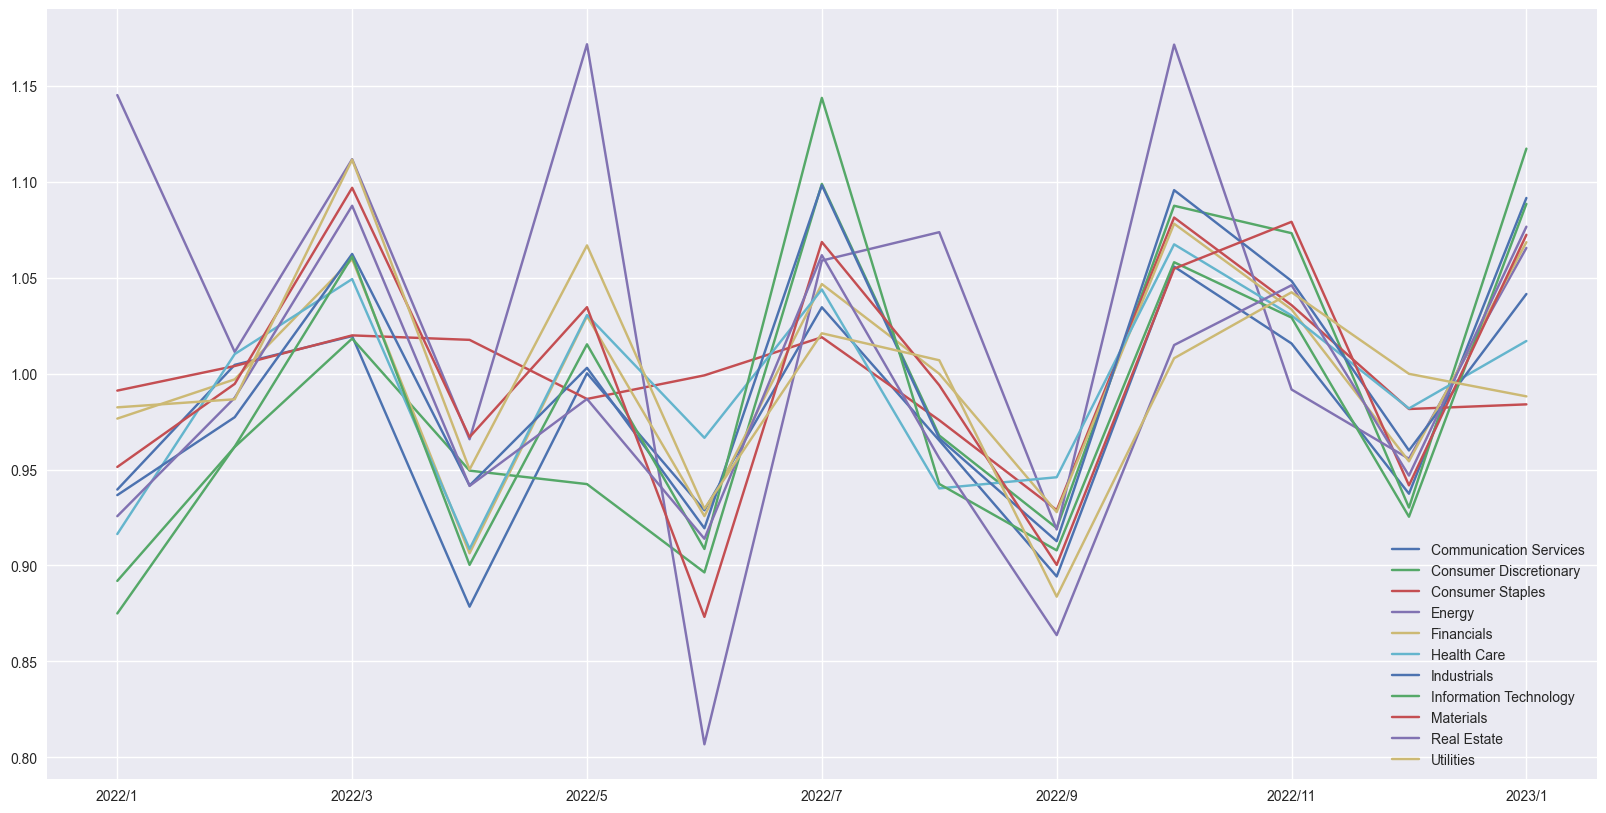

In [41]:
Monthly_sector_mr.plot(legend=True,figsize=(20, 10))

In [42]:
end = date.today()- timedelta(days=1)
start=end - timedelta(days=31)
stock_data={}
stock_to_analyze['is_null']=False
for index, row in stock_to_analyze.iterrows():
    stock=row.Symbol
    stock_data[stock]= yf.download(stock,start,end)
    if len(stock_data[stock])==0:
        stock_to_analyze.loc[index,'is_null'] = True
        
stock_to_analyze_filtred=stock_to_analyze[stock_to_analyze['is_null']==False]
stock_to_analyze_filtred['month_return']=stock_to_analyze_filtred.apply(lambda row : compute_month_return(row['Symbol']), axis=1)
stock_to_analyze_filtred['std']=stock_to_analyze_filtred.apply(lambda row : compute_std_deviation(row['Symbol']), axis=1)
stock_to_analyze_filtred=stock_to_analyze_filtred.sort_values(by=['month_return'], ascending=False)
best_stocks_last_month=stock_to_analyze_filtred.groupby('Sector').head(2)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ABMD: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[****************

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CTXS: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- NLOK: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/419622150.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['month_return']=stock_to_analyze_filtred.apply(lambda row : compute_month_return(row['Symbol']), axis=1)
/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_93931/419622150.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_to_analyze_filtred['std']=stock_to_analyze_filtred.apply(lambda row : compute_std_deviation(row['Symbol']), axis=1)


In [43]:
best_stocks_last_month

,Symbol,Name,Sector,is_null,month_return,std
436,TSLA,Tesla,Consumer Discretionary,False,1.3973,0.0469
90,CTLT,Catalent,Health Care,False,1.2866,0.0479
19,ALGN,Align Technology,Health Care,False,1.2042,0.0603
201,FTNT,Fortinet,Information Technology,False,1.1920,0.0301
109,CINF,Cincinnati Financial,Financials,False,1.1856,0.0261
479,GWW,W. W. Grainger,Industrials,False,1.1709,0.0296
48,ANET,Arista Networks,Information Technology,False,1.1347,0.0209
31,AXP,American Express,Financials,False,1.1344,0.0245
403,RCL,Royal Caribbean Group,Consumer Discretionary,False,1.1283,0.0235
463,URI,United Rentals,Industrials,False,1.1277,0.0262


In [44]:
Monthly_sector_mr.to_csv("Sectors_over_time.csv")
best_stocks_last_month.to_csv("Best_stock.csv")